In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
!ls ../input_data

3sigma.txt   channels.txt eval.csv     manifest.txt train.csv


In [3]:
eval = pd.read_csv('../input_data/eval.csv')

In [4]:
eval.head(10)

,row ID,time,EM_PIntkMnfld,EM_PExhMnfld,EM_TIntkMnfld,EM_TExhTrbDs,EM_NEng,EM_MFuInj,EM_PosnThrVlvDmd,EM_PosnWgDmd,EM_PosnEgrVlvDmd,EM_MfAir
0,Row497225,240.24,187.63,192.32,39.353,401.63,1400,128,99.991,21.262,29.999,975.92
1,Row497226,240.25,187.64,192.34,39.381,401.53,1400,128,99.991,21.262,29.999,975.92
2,Row497227,240.26,187.65,192.37,39.390,401.60,1400,128,99.991,21.262,29.999,975.92
3,Row497228,240.27,187.69,192.42,39.431,401.69,1400,128,99.991,21.262,29.999,974.22
4,Row497229,240.28,187.73,192.41,39.492,402.15,1400,128,99.991,21.262,29.999,974.22
5,Row497230,240.29,187.75,192.41,39.561,402.32,1400,128,99.991,21.262,29.999,974.22
6,Row497231,240.30,187.77,192.44,39.661,402.25,1400,128,99.991,21.262,29.999,974.22
7,Row497232,240.31,187.79,192.37,39.750,402.14,1400,128,99.991,21.262,29.999,974.22
8,Row497233,240.32,187.80,192.36,39.800,402.03,1400,128,99.991,21.262,29.999,974.22
9,Row497234,240.33,187.80,192.42,39.831,401.81,1400,128,99.991,21.262,29.999,974.22


In [5]:
eval.shape

(124307, 12)

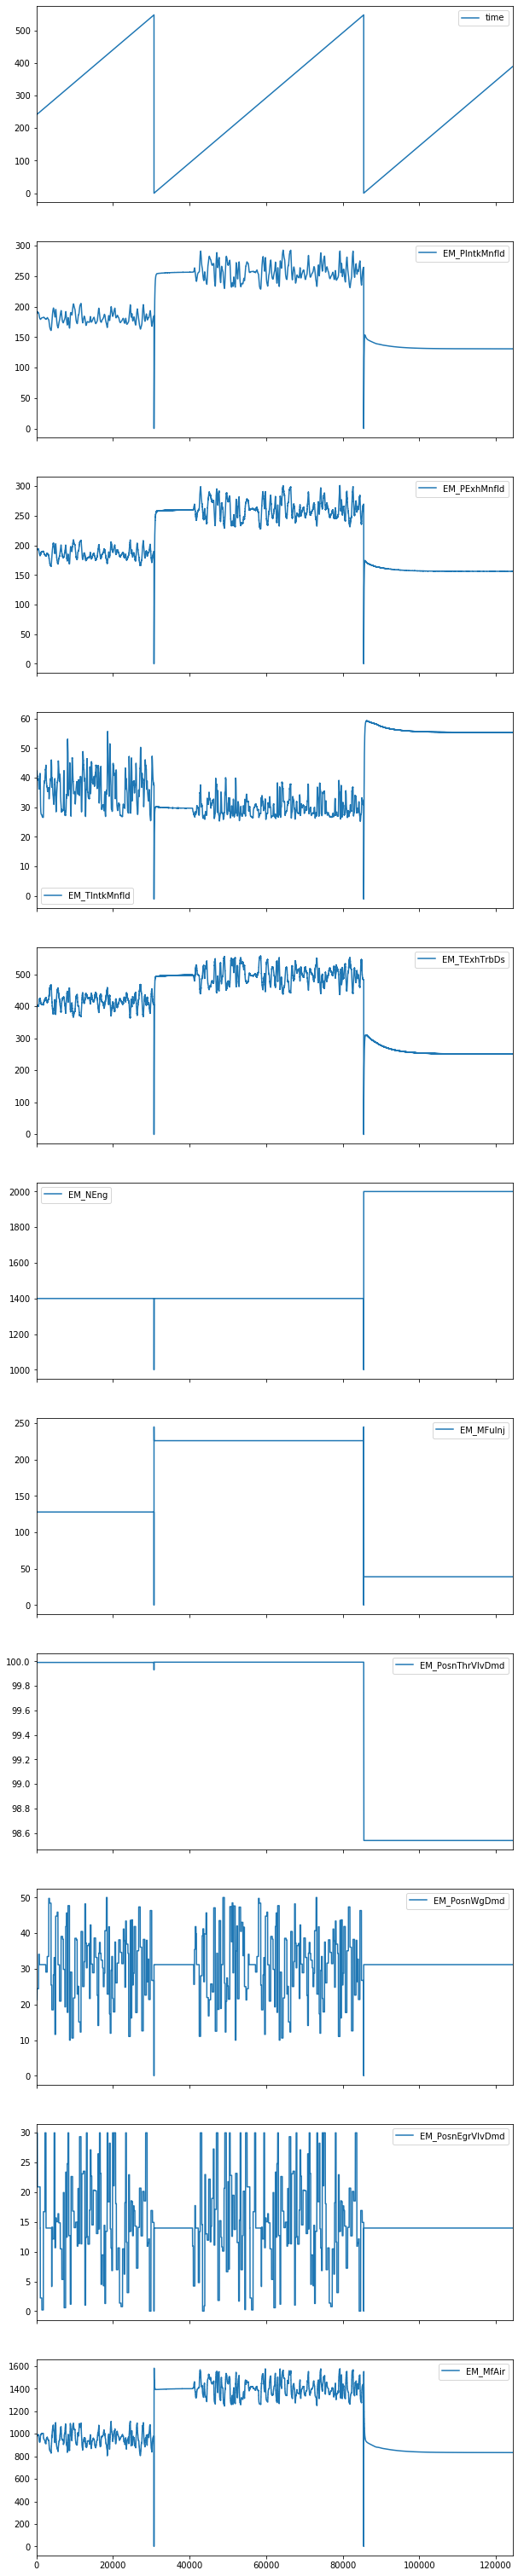

In [6]:
features = eval.columns.tolist()[1:]

fig, axs = plt.subplots(len(features), 1, sharex=True, figsize=(10, 5*len(features)))

for ax, col in zip(axs, features):
    eval[col].plot(legend=True, ax=ax)

In [7]:
eval['EM_MfAir']

0         975.92
1         975.92
2         975.92
3         974.22
4         974.22
           ...  
124302    833.48
124303    833.48
124304    833.48
124305    833.48
124306    833.48
Name: EM_MfAir, Length: 124307, dtype: float64

In [8]:
def standardize(values, mean, std):
    return (values-mean)/std

def revStandardize(values, mean, std):
    return (values*std)+mean

In [45]:
pred = revStandardize(standardize(eval['EM_PExhMnfld'], 128.027299, 27.618141), 414.976134, 245.724226)
pred.name = 'Prediction'
actual = eval['EM_MfAir']

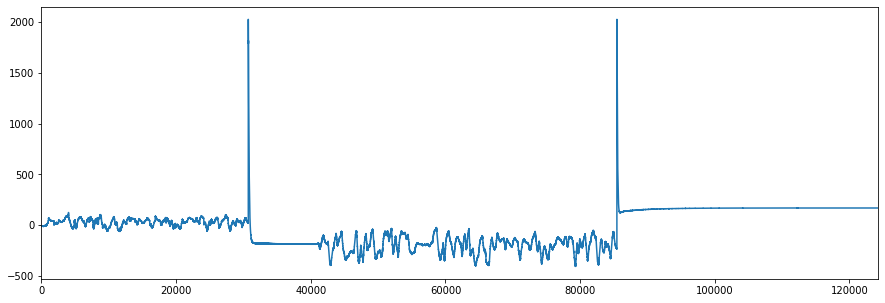

In [46]:
(actual-pred).plot()

In [47]:
error = actual-pred
eval['error'] = error

In [48]:
eval.corr()

,time,EM_PIntkMnfld,EM_PExhMnfld,EM_TIntkMnfld,EM_TExhTrbDs,EM_NEng,EM_MFuInj,EM_PosnThrVlvDmd,EM_PosnWgDmd,EM_PosnEgrVlvDmd,EM_MfAir,error
time,1.000000,0.136056,0.084791,-0.286845,0.236397,-0.379859,0.177441,0.379596,-0.008542,0.049495,0.035338,-0.152363
EM_PIntkMnfld,0.136056,1.000000,0.992178,-0.856378,0.903245,-0.813368,0.975147,0.814232,-0.074243,0.077876,0.970346,-0.954717
EM_PExhMnfld,0.084791,0.992178,1.000000,-0.800107,0.849740,-0.738150,0.947331,0.739147,-0.106315,0.067375,0.981081,-0.957654
EM_TIntkMnfld,-0.286845,-0.856378,-0.800107,1.000000,-0.919520,0.924275,-0.915460,-0.924387,-0.136683,0.090598,-0.793314,0.753817
EM_TExhTrbDs,0.236397,0.903245,0.849740,-0.919520,1.000000,-0.925174,0.960298,0.925780,0.093785,0.062246,0.825908,-0.825292
EM_NEng,-0.379859,-0.813368,-0.738150,0.924275,-0.925174,1.000000,-0.874501,-0.999934,0.008643,-0.078386,-0.702174,0.739629
EM_MFuInj,0.177441,0.975147,0.947331,-0.915460,0.960298,-0.874501,1.000000,0.875078,-0.002294,0.061225,0.941839,-0.888730
EM_PosnThrVlvDmd,0.379596,0.814232,0.739147,-0.924387,0.925780,-0.999934,0.875078,1.000000,-0.008580,0.078406,0.703022,-0.740776
EM_PosnWgDmd,-0.008542,-0.074243,-0.106315,-0.136683,0.093785,0.008643,-0.002294,-0.008580,1.000000,-0.129792,-0.126752,0.068427
EM_PosnEgrVlvDmd,0.049495,0.077876,0.067375,0.090598,0.062246,-0.078386,0.061225,0.078406,-0.129792,1.000000,0.031385,-0.116152


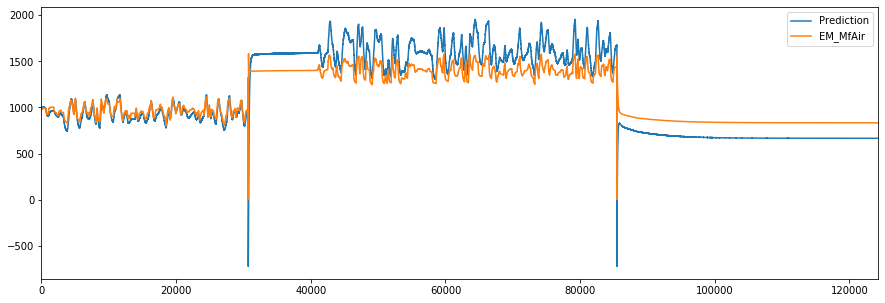

In [49]:
pred.plot(legend=True)
actual.plot(legend=True)

In [38]:
problematic = predicted<0

In [36]:
problematic[problematic].index

Int64Index([30719, 30720, 30721, 30722, 30723, 30724, 30725, 30726, 30727,
            30728, 30729, 30730, 30731, 30732, 30733, 30734, 30735, 30736,
            30737, 30738, 30739, 30740, 30741, 30742, 30743, 30744, 30745,
            30746, 30747, 30748, 30749, 30750, 30751, 30752, 30753, 30754,
            30755, 30756, 30757, 30758, 30759, 30760, 30761, 85462, 85463,
            85464, 85465, 85466, 85467, 85468, 85469, 85470, 85471, 85472,
            85473, 85474, 85475, 85476, 85477, 85478, 85479, 85480, 85481,
            85482, 85483, 85484, 85485, 85486, 85487, 85488, 85489, 85490,
            85491, 85492, 85493, 85494, 85495, 85496, 85497, 85498, 85499,
            85500, 85501, 85502, 85503, 85504, 85505, 85506, 85507],
           dtype='int64')

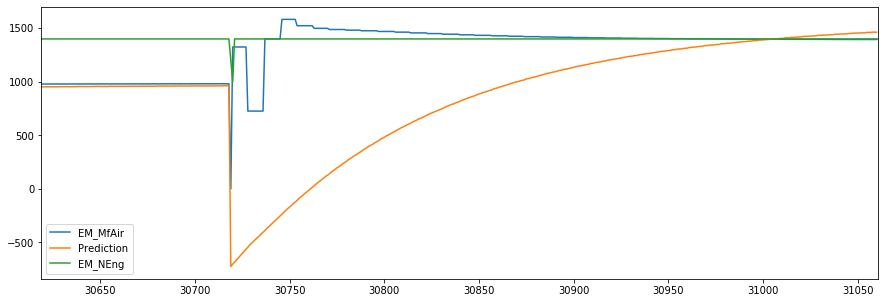

In [54]:
actual[30719-100:30761+300].plot(legend=True)
pred[30719-100:30761+300].plot(legend=True)
eval.loc[30719-100:30761+300, 'EM_NEng'].plot(legend=True)

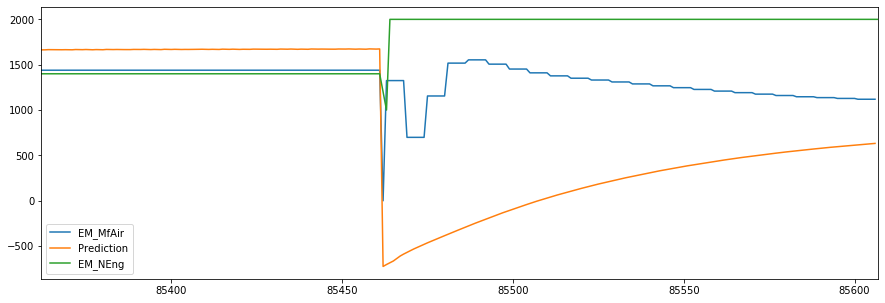

In [52]:
actual[85462-100:85507+100].plot(legend=True)
pred[85462-100:85507+100].plot(legend=True)
eval.loc[85462-100:85507+100, 'EM_NEng'].plot(legend=True)

In [136]:
pi = problematic[problematic].index
p_onset = []
offsets = []
last_pi = 0
mask_window = 200

# Store the index of all gearship indices
for i in pi:
    if i > last_pi+mask_window:
        p_onset.append(i)
        last_pi = i
        if(np.mean(pred[i-100:i]) > np.mean(pred[i+mask_window:i+mask_window+100])):
            offset = -pred[i]/4.0
        else:
            offset = +pred[i]/4.0
        offsets.append(offset)
        
p_onset.append(pred.index[-1])
print(offsets)

[-181.02720575217825, 181.02720575217825]


In [138]:
derived = pred.copy()
for on, off, offset in zip(p_onset, p_onset[1:], offsets):
    derived[on+1:off] += offset
    derived[on:on+mask_window*2] = derived[on:off].mean()

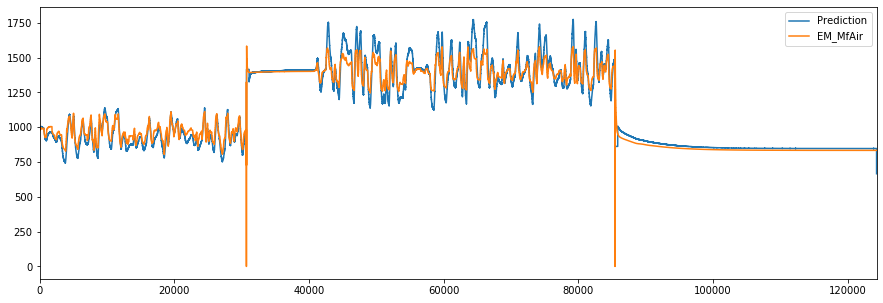

In [139]:
derived.plot(legend=True)
actual.plot(legend=True)

Error reamaining!


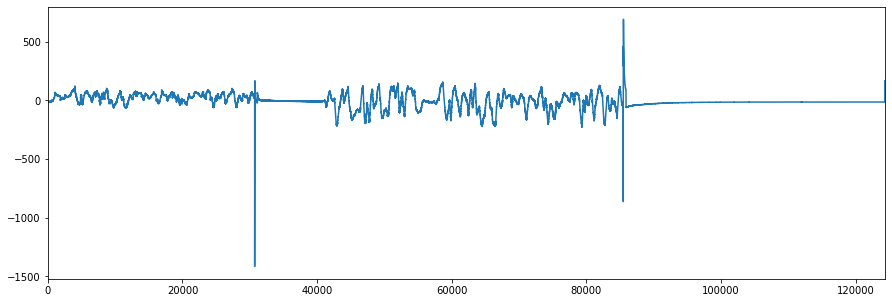

In [140]:
print("Error reamaining!")
(actual-derived).plot()


Accumulated absolute error!


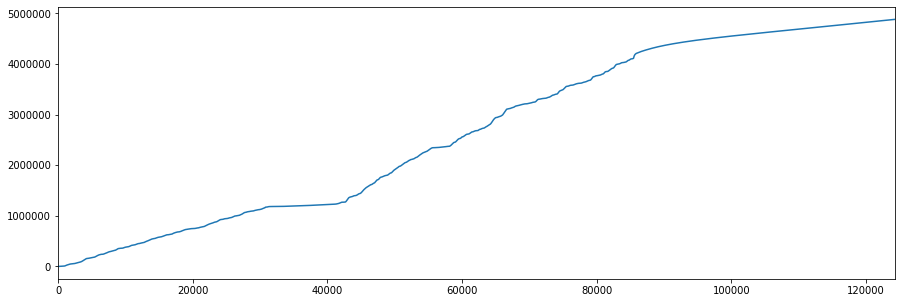

In [146]:
print("Accumulated absolute error!")
(actual-derived).abs().cumsum().plot()

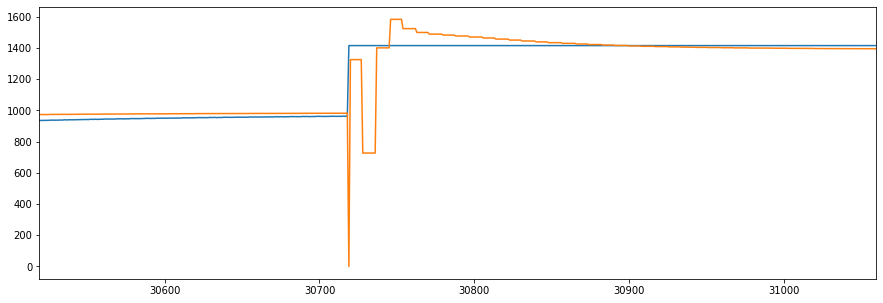

In [141]:
derived[30719-200:30761+300].plot()
actual[30719-200:30761+300].plot()

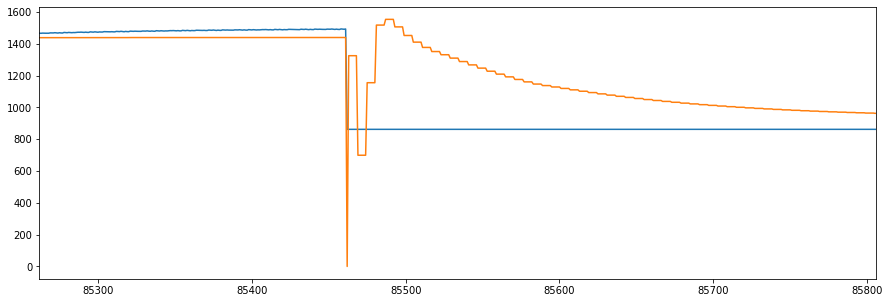

In [142]:
derived[85462-200:85507+300].plot()
actual[85462-200:85507+300].plot()

In [123]:
import math
def fit_percent(y_true: np.ndarray, y_pred: np.ndarray):
    """
    Should be smaller than 0.15%
    """
    rmse= math.sqrt(np.mean((y_true-y_pred)**2))
    std = np.std(y_true)
    return rmse/std

In [143]:
fit_percent(actual, derived)

0.22045245184685122

# Result
No good, the fitting error must be < 0.15